# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=322f9d81f357a0b411dcba663bea2963"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass 
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | korem
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | ironwood
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | uttar char fasson
Processing Record 10 of Set 1 | polva
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | aden
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | iquique
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | fuling
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | blackmans bay
Processing

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,37.13,86,75,2.30,CA,1696191726
1,tralee,52.2704,-9.7026,52.70,92,100,5.84,IE,1696191726
2,yellowknife,62.4560,-114.3525,47.41,94,100,10.36,CA,1696191447
3,korem,12.5058,39.5228,58.35,64,6,3.85,ET,1696191726
4,west island,-12.1568,96.8225,76.98,73,75,17.27,CC,1696191726


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,37.13,86,75,2.30,CA,1696191726
1,tralee,52.2704,-9.7026,52.70,92,100,5.84,IE,1696191726
2,yellowknife,62.4560,-114.3525,47.41,94,100,10.36,CA,1696191447
3,korem,12.5058,39.5228,58.35,64,6,3.85,ET,1696191726
4,west island,-12.1568,96.8225,76.98,73,75,17.27,CC,1696191726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

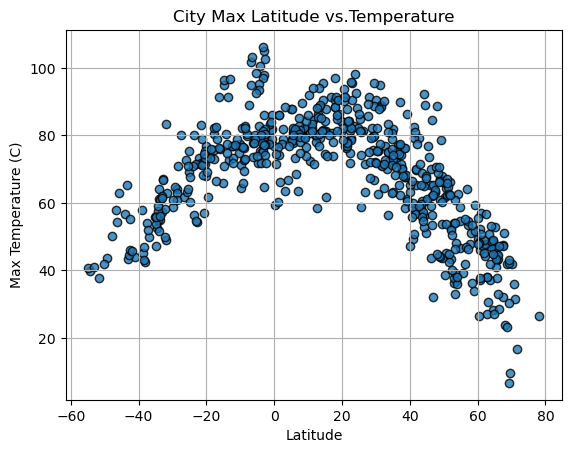

In [16]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Max Latitude vs.Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

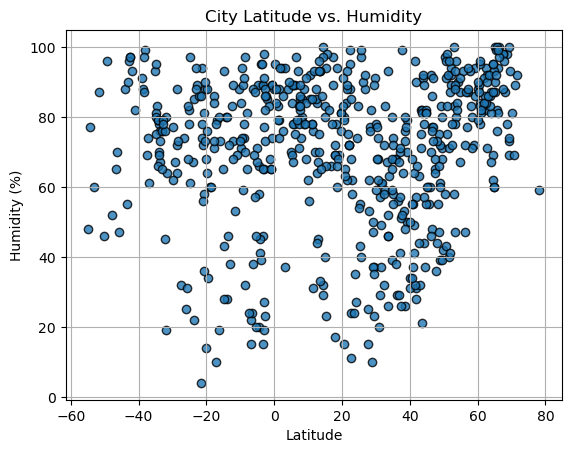

In [17]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

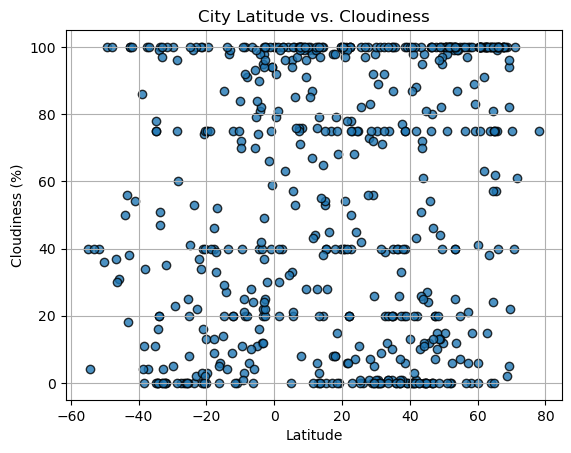

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

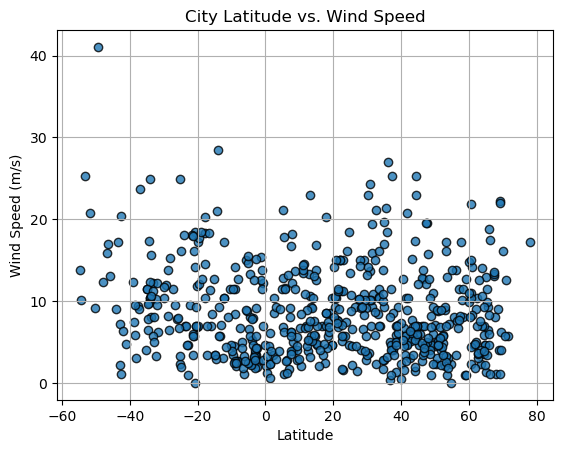

In [20]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Using linregress(variable 1, variable 2)
# Variables = lat, lng, wind speed, temp, cloudiness, humidity, 

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,37.13,86,75,2.30,CA,1696191726
1,tralee,52.2704,-9.7026,52.70,92,100,5.84,IE,1696191726
2,yellowknife,62.4560,-114.3525,47.41,94,100,10.36,CA,1696191447
3,korem,12.5058,39.5228,58.35,64,6,3.85,ET,1696191726
5,ironwood,46.4547,-90.1710,84.54,48,0,12.66,US,1696191727


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,west island,-12.1568,96.8225,76.98,73,75,17.27,CC,1696191726
6,dunedin,-45.8742,170.5036,63.07,47,31,13.11,NZ,1696191727
7,lebu,-37.6167,-73.6500,54.07,69,100,9.46,CL,1696191727
10,waitangi,-43.9535,-176.5597,56.82,88,50,8.99,NZ,1696191727
12,adamstown,-25.0660,-130.1015,69.04,82,8,24.87,PN,1696191727


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.795583313196216


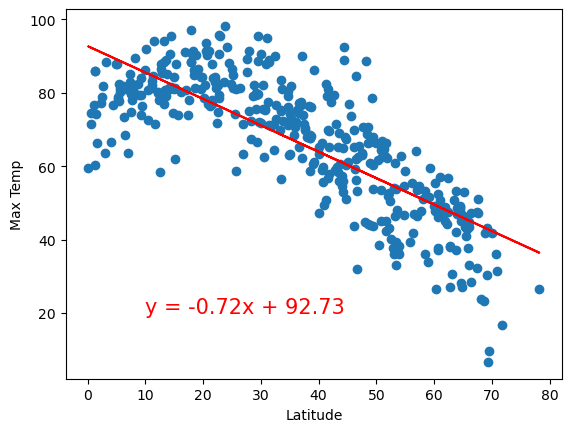

In [34]:
# Linear regression on Northern Hemisphere
val_1 = northern_hemi_df["Lat"]
val_2 = northern_hemi_df["Max Temp"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.8159016087007532


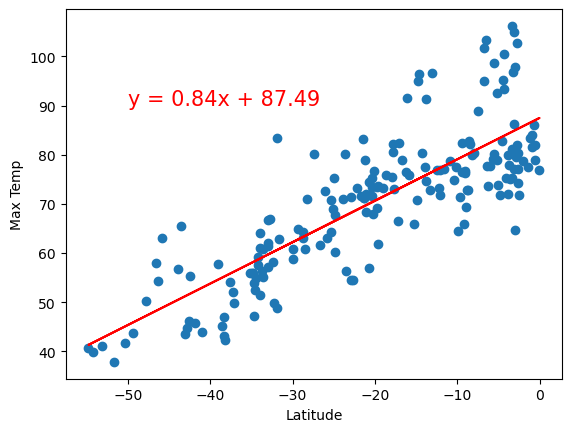

In [39]:
# Linear regression on Southern Hemisphere
val_1 = southern_hemi_df["Lat"]
val_2 = southern_hemi_df["Max Temp"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.11071832719838319


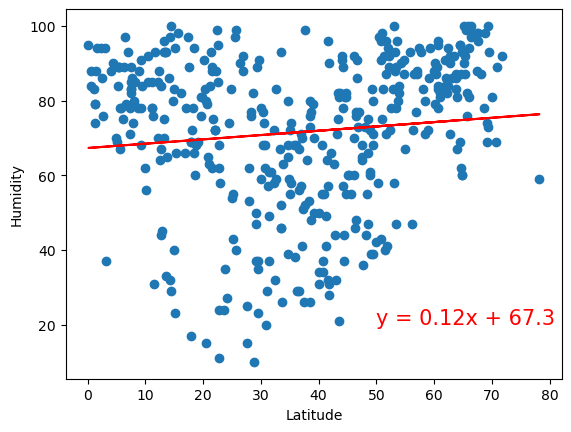

In [48]:
# Northern Hemisphere
val_1 = northern_hemi_df["Lat"]
val_2 = northern_hemi_df["Humidity"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is -0.1545357566140052


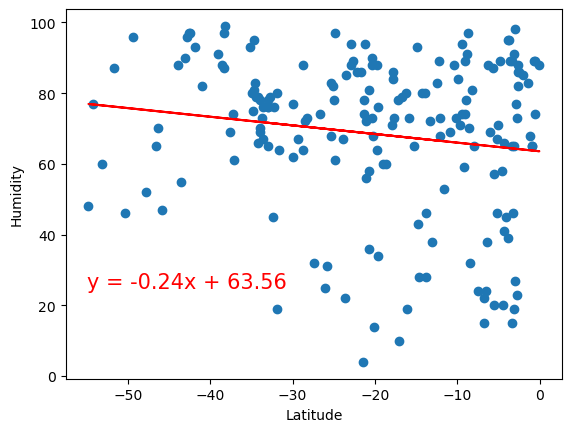

In [47]:
# Southern Hemisphere
val_1 = southern_hemi_df["Lat"]
val_2 = southern_hemi_df["Humidity"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
1. The northern and southern hemisphere demonstrate a strong corrolation between latitude and temperature. These graphs show that as the latituides coinverge towards the equator, there is an increase in the maximum temperatures recorded. 
2. In terms of humidity, both graphs are unable to provide any corrolation between humidity and latitude. These fiundings are supported by the r-values being close to zero.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.055499890791889855


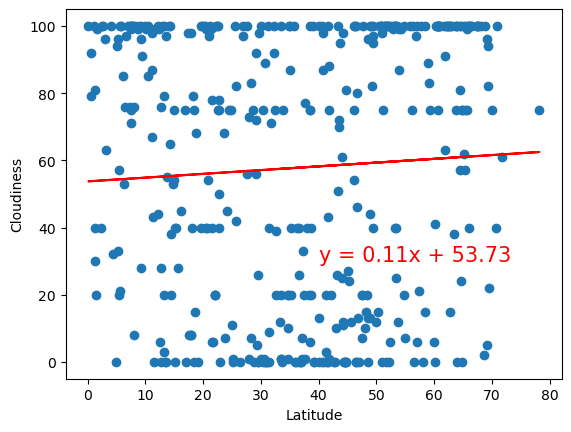

In [52]:
# Northern Hemisphere
val_1 = northern_hemi_df["Lat"]
val_2 = northern_hemi_df["Cloudiness"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.11580548862937254


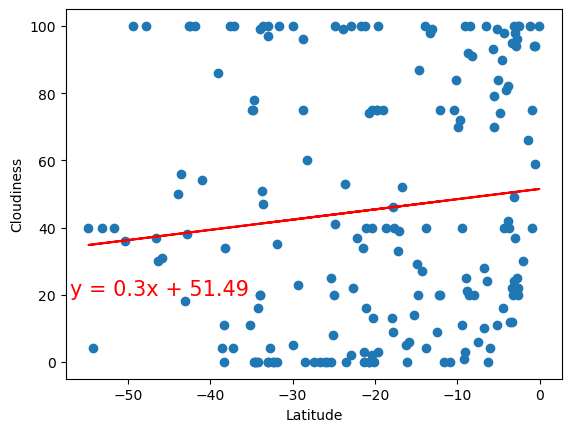

In [55]:
# Southern Hemisphere
val_1 = southern_hemi_df["Lat"]
val_2 = southern_hemi_df["Cloudiness"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
1. Generally the r-values suggest no corrolation between latitude and corrolation. Given the close proximity of the r-values acrtoss bopth hemijspheres being close to zero we can suggest that there is no plausible relationship between latitude and its effect on experiences cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.005102196955305268


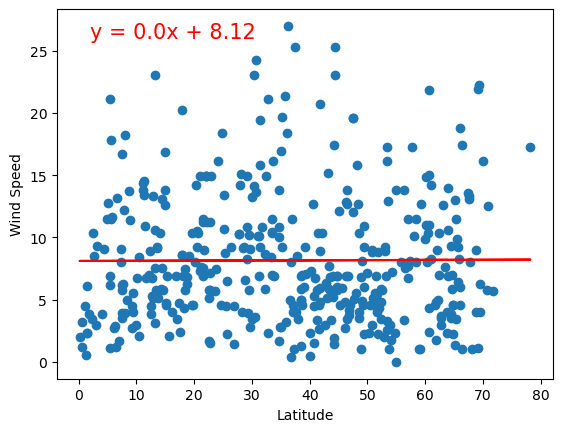

In [59]:
# Northern Hemisphere
val_1 = northern_hemi_df["Lat"]
val_2 = northern_hemi_df["Wind Speed"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(2,26),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.3352798941757639


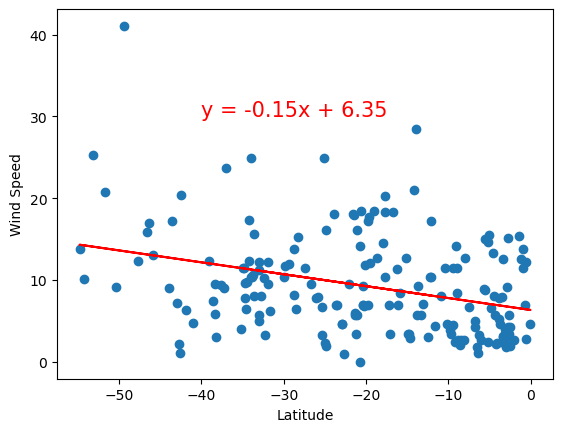

In [61]:
# Southern Hemisphere
val_1 = southern_hemi_df["Lat"]
val_2 = southern_hemi_df["Wind Speed"]
slope = linregress(val_1, val_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(val_1, val_2)
regress_values = val_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(val_1, val_2)
plt.plot(val_1, regress_values, "r")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
1. The northern hemisphere graph produced a low r-value and suggest no plausible relationship between the latitude and wind speed.
2. However, the same isn't true for the data plotted in the southern hemisphere graph. It suggests the data suggets a very weak correlation between latuitude and wind speed, in which places closer to the equator experience lower wind speeds. 